In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in TN middle school dataset from GitHub
df = pd.read_csv('data/middle_tn_schools.csv')

df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [3]:
df[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

In [4]:
# only view these two variables
df[['reduced_lunch', 'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


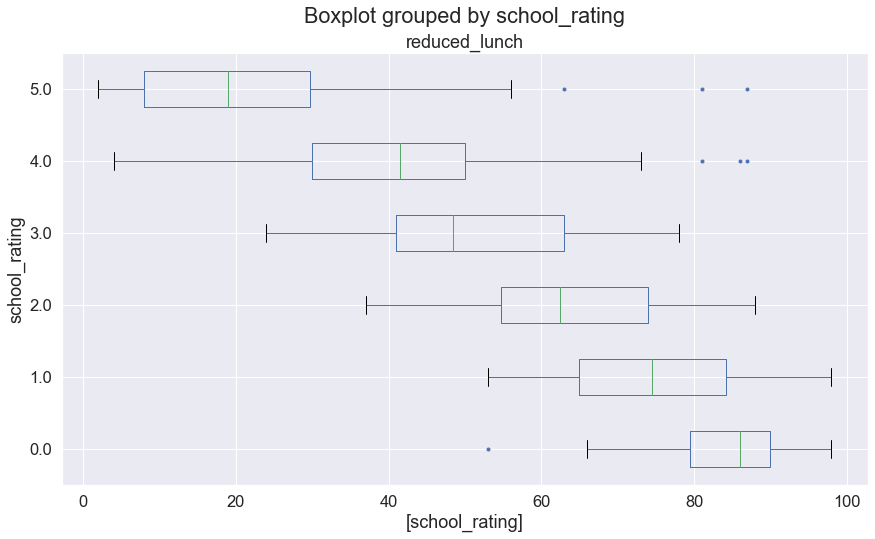

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('school_rating')

# boxplot with only these two variables
_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8), vert=False, sym='b.', ax=ax)

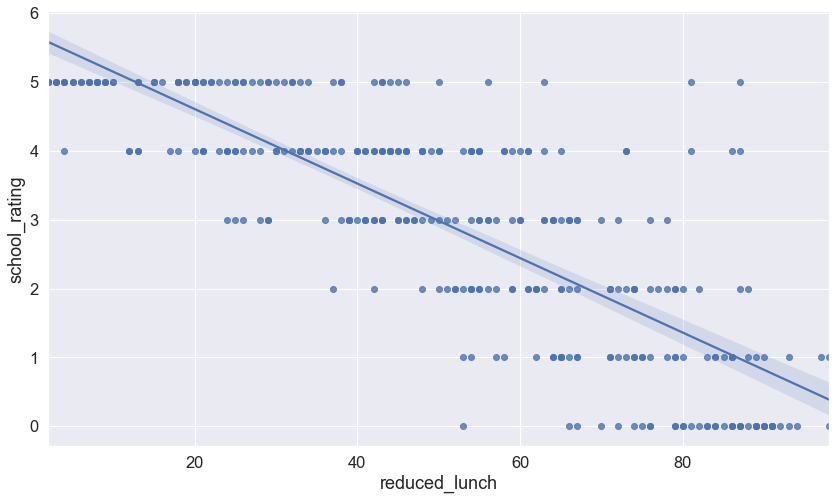

In [6]:
plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')

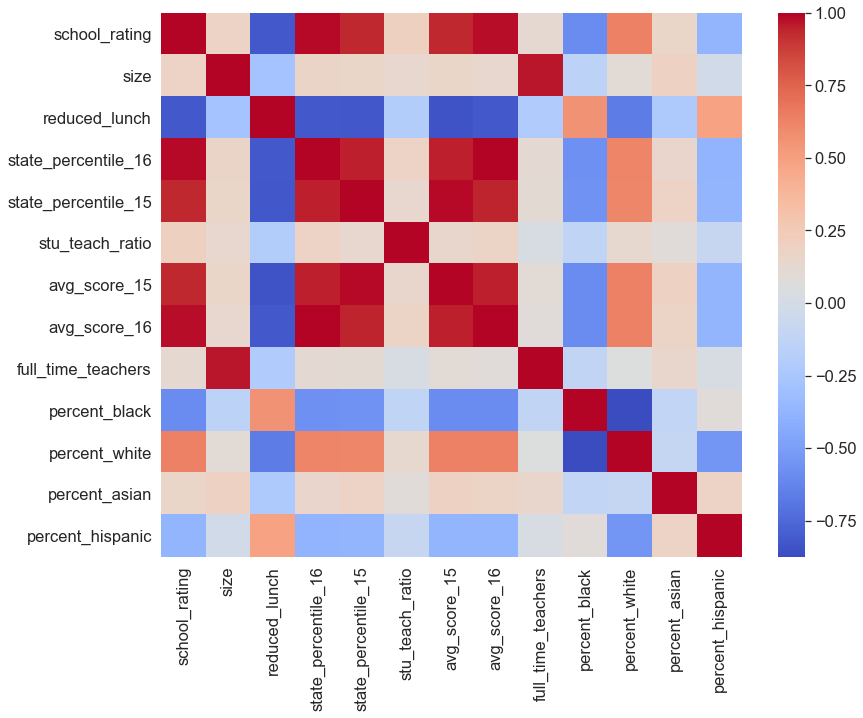

In [7]:
# create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')